In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('height_train.csv')
test = pd.read_csv('height_test.csv')

df = pd.DataFrame(PolynomialFeatures().fit_transform(train[['father_height', 'mother_height', 'boy_dummy']]))
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.76,1.60,0.0,3.0976,2.8160,0.00,2.5600,0.00,0.0
1,1.0,1.71,1.63,1.0,2.9241,2.7873,1.71,2.6569,1.63,1.0
2,1.0,1.70,1.66,0.0,2.8900,2.8220,0.00,2.7556,0.00,0.0
3,1.0,1.68,1.61,1.0,2.8224,2.7048,1.68,2.5921,1.61,1.0
4,1.0,1.72,1.70,1.0,2.9584,2.9240,1.72,2.8900,1.70,1.0


In [4]:
train['father_height'] = (train.father_height - train.father_height.mean()) / train.father_height.std()
train['mother_height'] = (train.mother_height - train.mother_height.mean()) / train.mother_height.std()
train['father_dummy'] = train.father_height * train.boy_dummy
train['mother_dummy'] = train.mother_height * train.boy_dummy

# test['father_height'] = (test.father_height - test.father_height.mean()) / test.father_height.std()
# test['mother_height'] = (test.mother_height - test.mother_height.mean()) / test.mother_height.std()
# test['father_dummy'] = test.father_height * test.boy_dummy
# test['mother_dummy'] = test.mother_height * test.boy_dummy

train.head()

,id,father_height,mother_height,boy_dummy,child_height,father_dummy,mother_dummy
0,0,0.573833,-0.604138,0,1.66,0.000000,-0.000000
1,1,-0.484041,0.065094,1,1.76,-0.484041,0.065094
2,2,-0.695616,0.734326,0,1.67,-0.000000,0.000000
3,3,-1.118765,-0.381061,1,1.75,-1.118765,-0.381061
4,4,-0.272466,1.626634,1,1.76,-0.272466,1.626634


In [5]:
test.head()

,id,father_height,mother_height,boy_dummy
0,5000,1.71,1.66,0
1,5001,1.69,1.63,1
2,5002,1.71,1.56,1
3,5003,1.68,1.67,1
4,5004,1.71,1.60,0


In [6]:
trainX = train.drop(['id', 'child_height'], axis=1)
trainY = train.child_height
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.25, random_state=42)
print('trainX.shape', trainX.shape)
print('valX.shape', valX.shape)
trainX.head()

trainX.shape (3750, 5)
valX.shape (1250, 5)


,father_height,mother_height,boy_dummy,father_dummy,mother_dummy
4884,0.362258,-0.604138,0,0.000000,-0.000000
3163,-1.541915,-1.273369,0,-0.000000,-0.000000
490,-0.060891,0.734326,1,-0.060891,0.734326
862,-0.484041,1.403557,1,-0.484041,1.403557
1740,-0.060891,-1.496447,1,-0.060891,-1.496447


#### LinearRegression

In [9]:
model = LinearRegression()
model.fit(X=trainX ,y=trainY)

# 2. 直接使用模型的predict()
predY = model.predict(valX[trainX.columns])

# 评估验证集分数 1.170883722882294
np.square(predY*100 - np.array(valY.values.tolist())*100).mean()

1.170883722882294

#### xgboost

In [15]:
import lightgbm as lgb

In [18]:
params = {'boosting_type':'gbdt', 'learning_rate':0.1, 'min_child_weight':1, 'max_depth':5, 
          'gamma':0.1, 'subsample':0.8, 'colsample_bytree':0.8, 'reg_alpha':0., 'reg_lambda':0.,
          'objective':'regression'}
dmat = lgb.Dataset(trainX, label=trainY)
cv = lgb.cv(params, dmat, num_boost_round=1000, nfold=5, stratified=False, early_stopping_rounds=50, verbose_eval=1, metrics='rmse')
len(cv['rmse-mean'])

[1]	cv_agg's rmse: 0.0493363 + 0.000671054
[2]	cv_agg's rmse: 0.0446984 + 0.000670006
[3]	cv_agg's rmse: 0.0406767 + 0.000666755
[4]	cv_agg's rmse: 0.0371123 + 0.000661112
[5]	cv_agg's rmse: 0.0339434 + 0.000660097
[6]	cv_agg's rmse: 0.0309311 + 0.000657955
[7]	cv_agg's rmse: 0.0282723 + 0.000667978
[8]	cv_agg's rmse: 0.0260593 + 0.000667789
[9]	cv_agg's rmse: 0.0239463 + 0.000665546
[10]	cv_agg's rmse: 0.022068 + 0.000666228
[11]	cv_agg's rmse: 0.020553 + 0.000661762
[12]	cv_agg's rmse: 0.0190894 + 0.000657564
[13]	cv_agg's rmse: 0.0179424 + 0.000649987
[14]	cv_agg's rmse: 0.0169557 + 0.00064162
[15]	cv_agg's rmse: 0.0159714 + 0.000636833
[16]	cv_agg's rmse: 0.0152483 + 0.000623829
[17]	cv_agg's rmse: 0.014496 + 0.000609319
[18]	cv_agg's rmse: 0.0138571 + 0.000589591
[19]	cv_agg's rmse: 0.0133175 + 0.000561926
[20]	cv_agg's rmse: 0.0128618 + 0.000537439
[21]	cv_agg's rmse: 0.0124769 + 0.000523547
[22]	cv_agg's rmse: 0.012157 + 0.000499861
[23]	cv_agg's rmse: 0.0118885 + 0.000478176
[2

63

In [26]:
lgbr = lgb.LGBMRegressor(learning_rate=0.1, min_child_weight=1, max_depth=5, gamma=0.1, 
                        subsample=0.8, colsample_bytree=0.8, reg_alpha=0., reg_lambda=0.,
                        objective='regression', num_leaves=32, n_estimators=63, min_child_samples=20,
                        feature_fraction=0.8)
param_grid = {'min_child_weight':[1,2,3,4,5,6,7,8,9,10]}
gridCV = GridSearchCV(lgbr, param_grid=param_grid)
gridCV.fit(trainX, trainY)
print('best parameter:', gridCV.best_params_)
print('best score:', gridCV.best_score_)

d:\python36\deeplearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best parameter: {'min_child_weight': 1}
best score: 0.961428819216359


In [36]:
lgbr = lgb.LGBMRegressor(learning_rate=0.2, min_child_weight=1, max_depth=3, gamma=0.1, 
                        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.0, reg_lambda=0.0,
                        objective='regression', num_leaves=32, n_estimators=63, min_child_samples=20,
                        feature_fraction=0.8)
lgbr.fit(trainX, trainY)
predY = lgbr.predict(valX)
# 评估验证集分数 1.170883722882294
np.square(predY*100 - np.array(valY.values.tolist())*100).mean()

1.2125880834151517

#### NN

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation

In [52]:
model = Sequential()
model.add(Dense(32, input_shape=(5,)))
model.add(Activation('relu'))
# model.add(Dense(16))
# model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
H = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(valX, valY), verbose=1)

Train on 3750 samples, validate on 1250 samples
Epoch 1/100
3750/3750 [==============================] - 1s 201us/step - loss: 0.3080 - mean_squared_error: 0.3080 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 2/100
3750/3750 [==============================] - 1s 135us/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 3/100
3750/3750 [==============================] - 0s 131us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 4/100
3750/3750 [==============================] - 1s 145us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5/100
3750/3750 [==============================] - 1s 142us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/100
3750/3750 [==============================] - 1s 149us/step - loss: 0.0022 - mean_squared_error: 0.0022 - 

3750/3750 [==============================] - 0s 130us/step - loss: 4.8756e-04 - mean_squared_error: 4.8756e-04 - val_loss: 5.6907e-04 - val_mean_squared_error: 5.6907e-04
Epoch 47/100
3750/3750 [==============================] - 0s 130us/step - loss: 4.8344e-04 - mean_squared_error: 4.8344e-04 - val_loss: 5.6426e-04 - val_mean_squared_error: 5.6426e-04
Epoch 48/100
3750/3750 [==============================] - 0s 128us/step - loss: 4.7818e-04 - mean_squared_error: 4.7818e-04 - val_loss: 5.6305e-04 - val_mean_squared_error: 5.6305e-04
Epoch 49/100
3750/3750 [==============================] - 0s 130us/step - loss: 4.7436e-04 - mean_squared_error: 4.7436e-04 - val_loss: 5.5448e-04 - val_mean_squared_error: 5.5448e-04
Epoch 50/100
3750/3750 [==============================] - 1s 137us/step - loss: 4.6967e-04 - mean_squared_error: 4.6967e-04 - val_loss: 5.5231e-04 - val_mean_squared_error: 5.5231e-04
Epoch 51/100
3750/3750 [==============================] - 0s 130us/step - loss: 4.6622e-04 - 

3750/3750 [==============================] - 0s 130us/step - loss: 3.5997e-04 - mean_squared_error: 3.5997e-04 - val_loss: 4.2098e-04 - val_mean_squared_error: 4.2098e-04
Epoch 91/100
3750/3750 [==============================] - 0s 131us/step - loss: 3.5811e-04 - mean_squared_error: 3.5811e-04 - val_loss: 4.1912e-04 - val_mean_squared_error: 4.1912e-04
Epoch 92/100
3750/3750 [==============================] - 1s 134us/step - loss: 3.5603e-04 - mean_squared_error: 3.5603e-04 - val_loss: 4.1673e-04 - val_mean_squared_error: 4.1673e-04
Epoch 93/100
3750/3750 [==============================] - 0s 128us/step - loss: 3.5453e-04 - mean_squared_error: 3.5453e-04 - val_loss: 4.1817e-04 - val_mean_squared_error: 4.1817e-04
Epoch 94/100
3750/3750 [==============================] - 1s 134us/step - loss: 3.5232e-04 - mean_squared_error: 3.5232e-04 - val_loss: 4.1489e-04 - val_mean_squared_error: 4.1489e-04
Epoch 95/100
3750/3750 [==============================] - 0s 131us/step - loss: 3.5102e-04 - 

In [51]:
predY = model.predict(valX, batch_size=32)
np.square(predY*100 - np.array(valY.values.tolist())*100).mean()

0.007259606818168976

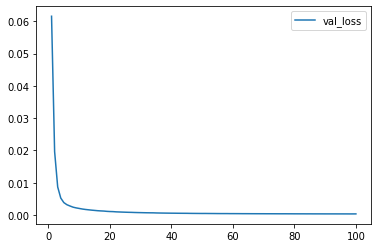

In [46]:
H.history.keys()
plt.figure()
plt.plot(range(1,101), H.history['val_loss'], label='val_loss')
# plt.plot(range(1,101), H.history['loss'], label='loss')
# plt.plot(range(1,101), H.history['val_mean_squared_error'], label='val_error')
# plt.plot(range(1,101), H.history['mean_squared_error'], label='error')
plt.legend()
plt.show()

In [18]:
result = pd.DataFrame({'id':test.id, 'prediction':predY})
result.to_csv('吴加清.csv', index=False)
result

,id,prediction
0,5000,1.654376
1,5001,1.737713
2,5002,1.729804
3,5003,1.742642
4,5004,1.636675
5,5005,1.784274
6,5006,1.644417
7,5007,1.745382
8,5008,1.760839
9,5009,1.650675


In [ ]:
def evaluate(prediction_path,real_path):
    predict = pd.read_csv(prediction_path)
    real = pd.read_csv(real_path)
    predict = predict.loc[:,['id','prediction']]
    real = real.loc[:,['id','child_height']]
    real = real.merge(predict,on='id',how='left')
    return np.square(real.prediction*100-real.child_height*100).mean()

### 隗同学的思路
我就加了两列，把boy_dummy和father_height还有mother_height分别乘了一下。
大致想法就是既然考虑性别了，那就也可以认为不同性别对父母依赖也不一样，所以加入这两列就等于考虑了这个因素。

In [92]:
from sklearn.linear_model import Lasso
Lasso?